In [3]:
car = read.csv('car.data.txt', header = F)
colnames(car) = c('buying_price', 'maint_price', 'no_doors', 'capacity', 'lug_boot', 'safety', 'acc')

Why is it a best practice to run the next cell right after loading data?

To make sure the data is loading correctly before working on it.

In [13]:
dim(car)

[1] 1728    7

Why are `no_doors` and `capacity` factors and not integers?

Because there would be missing data if it was more accurate or they were too lazy to make it accurate?

In [14]:
str(car)

'data.frame':	1728 obs. of  7 variables:
 $ buying_price: Factor w/ 4 levels "high","low","med",..: 4 4 4 4 4 4 4 4 4 4 ...
 $ maint_price : Factor w/ 4 levels "high","low","med",..: 4 4 4 4 4 4 4 4 4 4 ...
 $ no_doors    : Factor w/ 4 levels "2","3","4","5more": 1 1 1 1 1 1 1 1 1 1 ...
 $ capacity    : Factor w/ 3 levels "2","4","more": 1 1 1 1 1 1 1 1 1 2 ...
 $ lug_boot    : Factor w/ 3 levels "big","med","small": 3 3 3 2 2 2 1 1 1 3 ...
 $ safety      : Factor w/ 3 levels "high","low","med": 2 3 1 2 3 1 2 3 1 2 ...
 $ acc         : Factor w/ 4 levels "acc","good","unacc",..: 3 3 3 3 3 3 3 3 3 3 ...


What do the commands in the next cell do? Why are they necessary?

The first one loads the library caret in R. The caret is for short for _C_lassification _A_nd _RE_gression _T_raining) is a set of functions that attempt to streamline the process for creating predictive models.

The second is to have the same random seed set for reproducability in randomness.

In [15]:
library(caret)
set.seed(10)

What does the next cell  show? **Don't interpret the results. Tell me what the results are.**

It shows a table of the amount each acceptability of all the cars.

In [16]:
table(car$acc)


  acc  good unacc vgood 
  384    69  1210    65 

In [17]:
prop.table(table(car$acc))


       acc       good      unacc      vgood 
0.22222222 0.03993056 0.70023148 0.03761574 

If `acc` is the target, what kind of a machine learning problem is this? What would be a good metric for the problem? Why? What would be a good benchmark? Why?

Classification. 

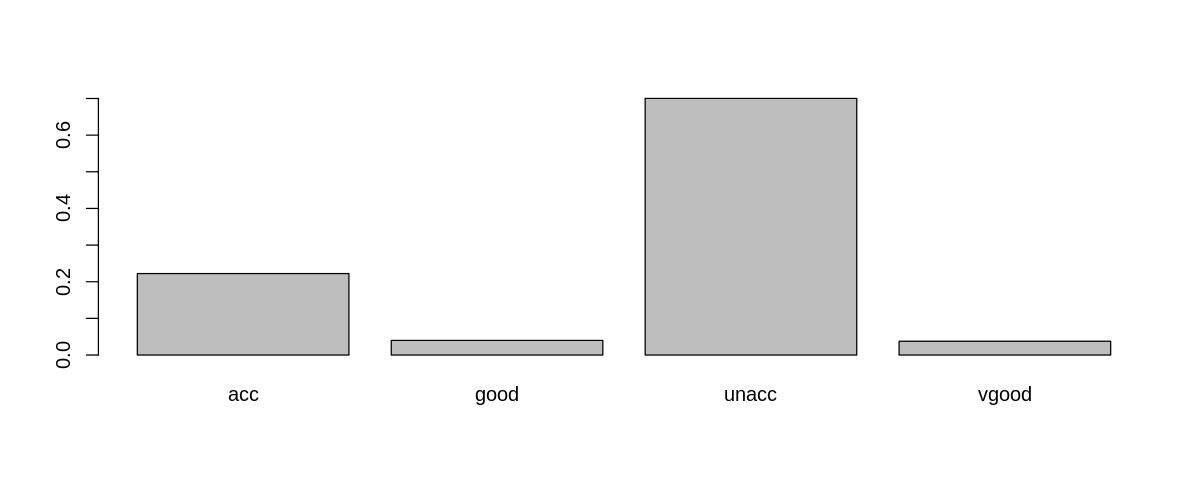

In [18]:
library(repr)
options(repr.plot.width=10, repr.plot.height=4)
barplot(prop.table(table(car$acc)))

Describe the distribution of the target class.

There is about half as many acceptable car as unacceptable cars. Good and very good are rare but pretty much exactly the same amount.

What does the next cell show?

adding up the columns and checkking if there are any missing data in any car

In [19]:
colSums(is.na(car))

buying_price  maint_price     no_doors     capacity     lug_boot       safety 
           0            0            0            0            0            0 
         acc 
           0

In [23]:
car_numeric_features = Filter(is.numeric, car)

What do the commands in the next cell do? Why are they necessary?

"train_index <- createDataPartition(car$acc,p=0.8,list=FALSE)"
A series of test/training partitions are created from acceptable list in cars, which 80 percent of data going into training and having the result not be returned in a list.

"training_data <- car[train_index,]"
creating a group based on the 80 percent grabbed from above.

"test_data <- car[-train_index,]"
creating a group based on the 20 percent created from the data partition.

In [21]:
train_index <- createDataPartition(car$acc,p=0.8,list=FALSE)
training_data <- car[train_index,]
test_data <- car[-train_index,]

Interpret these results. How should these results impact our work?

In [ ]:
We can use the train data to make predictions and comapre them to the test data.

In [38]:
train_index

Resample1
 [1,]  1       
 [2,]  2       
 [3,]  3       
 [4,]  4       
 [5,]  5       
 [6,]  6       
 [7,]  7       
 [8,]  8       
 [9,]  9       
[10,] 10       
[11,] 11       
[12,] 12       
[13,] 13       
[14,] 15       
[15,] 16       
[16,] 17       
[17,] 18       
[18,] 19       
[19,] 20       
[20,] 21       
[21,] 22       
[22,] 23       
[23,] 24       
[24,] 26       
[25,] 28       
[26,] 29       
[27,] 30       
[28,] 31       
[29,] 32       
[30,] 33       
[31,] ⋮        
[32,] 1692     
[33,] 1693     
[34,] 1694     
[35,] 1697     
[36,] 1699     
[37,] 1700     
[38,] 1701     
[39,] 1702     
[40,] 1703     
[41,] 1704     
[42,] 1705     
[43,] 1706     
[44,] 1708     
[45,] 1709     
[46,] 1710     
[47,] 1711     
[48,] 1712     
[49,] 1713     
[50,] 1714     
[51,] 1715     
[52,] 1716     
[53,] 1717     
[54,] 1718     
[55,] 1720     
[56,] 1723     
[57,] 1724     
[58,] 1725     
[59,] 1726     
[60,] 1727     
[61,] 1728

In [36]:
training_data

buying_price maint_price no_doors capacity lug_boot safety acc  
1    vhigh        vhigh       2        2        small    low    unacc
2    vhigh        vhigh       2        2        small    med    unacc
3    vhigh        vhigh       2        2        small    high   unacc
4    vhigh        vhigh       2        2        med      low    unacc
5    vhigh        vhigh       2        2        med      med    unacc
6    vhigh        vhigh       2        2        med      high   unacc
7    vhigh        vhigh       2        2        big      low    unacc
8    vhigh        vhigh       2        2        big      med    unacc
9    vhigh        vhigh       2        2        big      high   unacc
10   vhigh        vhigh       2        4        small    low    unacc
11   vhigh        vhigh       2        4        small    med    unacc
12   vhigh        vhigh       2        4        small    high   unacc
13   vhigh        vhigh       2        4        med      low    unacc
15   vhigh        vhigh       2        4        med      high   unacc
16   vhigh        vhigh       2        4        big      low    unacc
17   vhigh        vhigh       2        4        big      med    unacc
18   vhigh        vhigh       2        4        big      high   unacc
19   vhigh        vhigh       2        more     small    low    unacc
20   vhigh        vhigh       2        more     small    med    unacc
21   vhigh        vhigh       2        more     small    high   unacc
22   vhigh        vhigh       2        more     med      low    unacc
23   vhigh        vhigh       2        more     med      med    unacc
24   vhigh        vhigh       2        more     med      high   unacc
26   vhigh        vhigh       2        more     big      med    unacc
28   vhigh        vhigh       3        2        small    low    unacc
29   vhigh        vhigh       3        2        small    med    unacc
30   vhigh        vhigh       3        2        small    high   unacc
31   vhigh        vhigh       3        2        med      low    unacc
32   vhigh        vhigh       3        2        med      med    unacc
33   vhigh        vhigh       3        2        med      high   unacc
⋮    ⋮            ⋮           ⋮        ⋮        ⋮        ⋮      ⋮    
1692 low          low         4        4        big      high   vgood
1693 low          low         4        more     small    low    unacc
1694 low          low         4        more     small    med    acc  
1697 low          low         4        more     med      med    good 
1699 low          low         4        more     big      low    unacc
1700 low          low         4        more     big      med    good 
1701 low          low         4        more     big      high   vgood
1702 low          low         5more    2        small    low    unacc
1703 low          low         5more    2        small    med    unacc
1704 low          low         5more    2        small    high   unacc
1705 low          low         5more    2        med      low    unacc
1706 low          low         5more    2        med      med    unacc
1708 low          low         5more    2        big      low    unacc
1709 low          low         5more    2        big      med    unacc
1710 low          low         5more    2        big      high   unacc
1711 low          low         5more    4        small    low    unacc
1712 low          low         5more    4        small    med    acc  
1713 low          low         5more    4        small    high   good 
1714 low          low         5more    4        med      low    unacc
1715 low          low         5more    4        med      med    good 
1716 low          low         5more    4        med      high   vgood
1717 low          low         5more    4        big      low    unacc
1718 low          low         5more    4        big      med    good 
1720 low          low         5more    more     small    low    unacc
1723 low          low         5more    more     med      low    unacc
1724 low       

In [35]:
test_data

buying_price maint_price no_doors capacity lug_boot safety acc  
14   vhigh        vhigh       2        4        med      med    unacc
25   vhigh        vhigh       2        more     big      low    unacc
27   vhigh        vhigh       2        more     big      high   unacc
37   vhigh        vhigh       3        4        small    low    unacc
51   vhigh        vhigh       3        more     med      high   unacc
52   vhigh        vhigh       3        more     big      low    unacc
54   vhigh        vhigh       3        more     big      high   unacc
55   vhigh        vhigh       4        2        small    low    unacc
56   vhigh        vhigh       4        2        small    med    unacc
64   vhigh        vhigh       4        4        small    low    unacc
72   vhigh        vhigh       4        4        big      high   unacc
74   vhigh        vhigh       4        more     small    med    unacc
81   vhigh        vhigh       4        more     big      high   unacc
82   vhigh        vhigh       5more    2        small    low    unacc
87   vhigh        vhigh       5more    2        med      high   unacc
97   vhigh        vhigh       5more    4        big      low    unacc
109  vhigh        high        2        2        small    low    unacc
123  vhigh        high        2        4        med      high   unacc
128  vhigh        high        2        more     small    med    unacc
133  vhigh        high        2        more     big      low    unacc
138  vhigh        high        3        2        small    high   unacc
146  vhigh        high        3        4        small    med    unacc
151  vhigh        high        3        4        big      low    unacc
154  vhigh        high        3        more     small    low    unacc
156  vhigh        high        3        more     small    high   unacc
166  vhigh        high        4        2        med      low    unacc
167  vhigh        high        4        2        med      med    unacc
173  vhigh        high        4        4        small    med    unacc
181  vhigh        high        4        more     small    low    unacc
184  vhigh        high        4        more     med      low    unacc
⋮    ⋮            ⋮           ⋮        ⋮        ⋮        ⋮      ⋮    
1574 low          med         4        2        big      med    unacc
1575 low          med         4        2        big      high   unacc
1576 low          med         4        4        small    low    unacc
1586 low          med         4        more     small    med    acc  
1589 low          med         4        more     med      med    good 
1591 low          med         4        more     big      low    unacc
1593 low          med         4        more     big      high   vgood
1598 low          med         5more    2        med      med    unacc
1605 low          med         5more    4        small    high   good 
1616 low          med         5more    more     med      med    good 
1620 low          med         5more    more     big      high   vgood
1622 low          low         2        2        small    med    unacc
1625 low          low         2        2        med      med    unacc
1630 low          low         2        4        small    low    unacc
1631 low          low         2        4        small    med    acc  
1645 low          low         2        more     big      low    unacc
1646 low          low         2        more     big      med    good 
1652 low          low         3        2        med      med    unacc
1653 low          low         3        2        med      high   unacc
1678 low          low         4        2        med      low    unacc
1679 low          low         4        2        med      med    unacc
1680 low          low         4        2        med      high   unacc
1685 low          low         4        4        small    med    acc  
1695 low          low         4        more     small    high   good 
1696 low          low         4        more     med      low    unacc
1698 low       

In [39]:
prop.table(table(training_data$acc))
prop.table(table(test_data$acc))


       acc       good      unacc      vgood 
0.22254335 0.04046243 0.69942197 0.03757225 


      acc      good     unacc     vgood 
0.2209302 0.0377907 0.7034884 0.0377907 

## EDA

In [40]:
attach(training_data)

In [41]:
table(buying_price)
prop.table(table(buying_price, acc), 1)

table(maint_price)
prop.table(table(maint_price, acc), 1)

table(no_doors)
prop.table(table(no_doors, acc), 1)

table(capacity)
prop.table(table(capacity, acc), 1)

table(lug_boot)
prop.table(table(lug_boot, acc), 1)

table(safety)
prop.table(table(safety, acc), 1)

buying_price
 high   low   med vhigh 
  343   347   346   348 

            acc
buying_price        acc       good      unacc      vgood
       high  0.26239067 0.00000000 0.73760933 0.00000000
       low   0.20172911 0.11239193 0.59365994 0.09221902
       med   0.26589595 0.04913295 0.62716763 0.05780347
       vhigh 0.16091954 0.00000000 0.83908046 0.00000000

maint_price
 high   low   med vhigh 
  346   352   339   347 

           acc
maint_price        acc       good      unacc      vgood
      high  0.24277457 0.00000000 0.72543353 0.03179191
      low   0.21022727 0.10511364 0.62500000 0.05965909
      med   0.27433628 0.05604720 0.61061947 0.05899705
      vhigh 0.16426513 0.00000000 0.83573487 0.00000000

no_doors
    2     3     4 5more 
  345   350   345   344 

        acc
no_doors        acc       good      unacc      vgood
   2     0.16231884 0.03768116 0.77101449 0.02898551
   3     0.23714286 0.04000000 0.68857143 0.03428571
   4     0.25507246 0.04637681 0.65507246 0.04347826
   5more 0.23546512 0.03779070 0.68313953 0.04360465

capacity
   2    4 more 
 470  467  447 

        acc
capacity        acc       good      unacc      vgood
    2    0.00000000 0.00000000 1.00000000 0.00000000
    4    0.32334047 0.06638116 0.55674518 0.05353319
    more 0.35123043 0.05592841 0.53243848 0.06040268

lug_boot
  big   med small 
  461   465   458 

        acc
lug_boot        acc       good      unacc      vgood
   big   0.24728850 0.04772234 0.63557484 0.06941432
   med   0.23655914 0.03870968 0.68172043 0.04301075
   small 0.18340611 0.03493450 0.78165939 0.00000000

safety
high  low  med 
 463  450  471 

      acc
safety        acc       good      unacc      vgood
  high 0.34557235 0.04967603 0.49244060 0.11231102
  low  0.00000000 0.00000000 1.00000000 0.00000000
  med  0.31422505 0.07006369 0.61571125 0.00000000

Which two features will be the strongest indicator of unacceptability? Why?

Safey and Capacity. They scored a 100% in predictability.

## BONUS

Prepare a vectorized model for acceptability.

In [13]:
number_of_acceptablecars = length(car$acc)
number_of_acceptablecars

none_acceptable = rep(0, number_of_acceptablecars)


for (i in 1:number_of_acceptablecars) {
    acceptabilitymodel[i] = car$acc[i]
}

acceptabilitymodel

[1] 1728

[1] 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
  [38] 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
  [75] 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 [112] 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 [149] 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 [186] 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 [223] 3 3 3 3 3 1 3 3 1 3 1 1 3 3 3 3 3 1 3 1 1 3 3 3 3 3 3 3 3 3 3 3 1 3 3 1 3
 [260] 1 1 3 3 1 3 1 1 3 1 1 3 3 3 3 3 3 3 3 3 3 3 1 3 1 1 3 1 1 3 3 1 3 1 1 3 1
 [297] 1 3 3 3 3 3 3 3 3 3 3 3 1 3 1 1 3 1 1 3 3 1 3 1 1 3 1 1 3 3 3 3 3 3 3 3 3
 [334] 3 3 1 3 3 1 3 1 1 3 3 3 3 3 1 3 1 1 3 3 3 3 3 3 3 3 3 3 3 1 3 3 1 3 1 1 3
 [371] 3 1 3 1 1 3 1 1 3 3 3 3 3 3 3 3 3 3 3 1 3 1 1 3 1 1 3 3 1 3 1 1 3 1 1 3 3
 [408] 3 3 3 3 3 3 3 3 3 1 3 1 1 3 1 1 3 3 1 3 1 1 3 1 1 3 3 3 3 3 3 3 3 3 3 3 3
 [445] 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 [482] 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 [519] 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 1 3 3 1
 [556] 3 1 1 3 3 3 3 3 1 3 1 1 3 3 3 3 3 3 3 3 3 3 3 1 3 3 1 3 1 1 3 3 1 3 1 1 3
 [593] 1 1 3 3 3 3 3 3 3 3 3 3 3 1 3 1 1 3 1 1 3 3 1 3 1 1 3 1 1 3 3 3 3 3 3 3 3
 [630] 3 3 3 1 3 1 1 3 1 1 3 3 1 3 1 1 3 1 1 3 3 3 3 3 3 3 3 3 3 3 1 3 3 1 3 1 1
 [667] 3 3 3 3 3 1 3 1 1 3 3 3 3 3 3 3 3 3 3 3 1 3 3 1 3 1 1 3 3 1 3 1 1 3 1 1 3
 [704] 3 3 3 3 3 3 3 3 3 3 1 3 1 1 3 1 1 3 3 1 3 1 1 3 1 1 3 3 3 3 3 3 3 3 3 3 3
 [741] 1 3 1 1 3 1 1 3 3 1 3 1 1 3 1 1 3 3 3 3 3 3 3 3 3 3 3 1 3 3 1 3 1 1 3 3 3
 [778] 3 3 1 3 1 1 3 3 3 3 3 3 3 3 3 3 3 1 3 3 1 3 1 1 3 3 1 3 1 1 3 1 1 3 3 3 3
 [815] 3 3 3 3 3 3 3 1 3 1 1 3 1 1 3 3 1 3 1 1 3 1 1 3 3 3 3 3 3 3 3 3 3 3 1 3 1
 [852] 1 3 1 1 3 3 1 3 1 1 3 1 1 3 3 3 3 3 3 3 3 3 3 3 1 3 3 1 3 1 1 3 3 3 3 3 1
 [889] 3 1 1 3 3 3 3 3 3 3 3 3 3 3 1 3 3 1 3 1 1 3 3 1 3 1 1 3 1 1 3 3 3 3 3 3 3
 [926] 3 3 3 3 1 3 1 1 3 1 1 3 3 1 3 1 1 3 1 1 3 3 3 3 3 3 3 3 3 3 3 1 3 1 1 3 1
 [963] 1 3 3 1 3 1 1 3 1 1 3 3 3 3 3 3 3 3 3 3 3 1 3 3 1 3 1 1 3 3 3 3 3 1 3 1 1
[1000] 3 3 3 3 3 3 3 3 3 3 3 1 3 3 1 3 1 1 3 3 1 3 1 1 3 1 1 3 3 3 3 3 3 3 3 3 3
[1037] 3 1 3 1 1 3 1 1 3 3 1 3 1 1 3 1 1 3 3 3 3 3 3 3 3 3 3 3 1 3 1 1 3 1 1 3 3
[1074] 1 3 1 1 3 1 1 3 3 3 3 3 3 3 3 3 3 1 1 3 1 1 3 1 4 3 3 3 3 1 1 3 1 4 3 3 3
[1111] 3 3 3 3 3 3 3 1 1 3 1 1 3 1 4 3 1 1 3 1 4 3 1 4 3 3 3 3 3 3 3 3 3 3 1 1 3
[1148] 1 4 3 1 4 3 1 1 3 1 4 3 1 4 3 3 3 3 3 3 3 3 3 3 1 1 3 1 4 3 1 4 3 1 1 3 1
[1185] 4 3 1 4 3 3 3 3 3 3 3 3 3 3 1 2 3 1 2 3 2 4 3 3 3 3 1 2 3 2 4 3 3 3 3 3 3
[1222] 3 3 3 3 1 2 3 1 2 3 2 4 3 1 2 3 2 4 3 2 4 3 3 3 3 3 3 3 3 3 3 1 2 3 2 4 3
[1259] 2 4 3 1 2 3 2 4 3 2 4 3 3 3 3 3 3 3 3 3 3 1 2 3 2 4 3 2 4 3 1 2 3 2 4 3 2
[1296] 4 3 3 3 3 3 3 3 3 3 3 3 1 3 3 1 3 1 1 3 3 3 3 3 1 3 1 1 3 3 3 3 3 3 3 3 3
[1333] 3 3 1 3 3 1 3 1 1 3 3 1 3 1 1 3 1 1 3 3 3 3 3 3 3 3 3 3 3 1 3 1 1 3 1 1 3
[1370] 3 1 3 1 1 3 1 1 3 3 3 3 3 3 3 3 3 3 3 1 3 1 1 3 1 1 3 3 1 3 1 1 3 1 1 3 3
[1407] 3 3 3 3 3 3 3 3 1 1 3 1 1 3 1 4 3 3 3 3 1 1 3 1 4 3 3 3 3 3 3 3 3 3 3 1 1
[1444] 3 1 1 3 1 4 3 1 1 3 1 4 3 1 4 3 3 3 3 3 3 3 3 3 3 1 1 3 1 4 3 1 4 3 1 1 3
[1481] 1 4 3 1 4 3 3 3 3 3 3 3 3 3 3 1 1 3 1 4 3 1 4 3 1 1 3 1 4 3 1 4 3 3 3 3 3
[1518] 3 3 3 3 3 1 2 3 1 2 3 2 4 3 3 3 3 1 2 3 2 4 3 3 3 3 3 3 3 3 3 3 1 2 3 1 2
[1555] 3 2 4 3 1 2 3 2 4 3 2 4 3 3 3 3 3 3 3 3 3 3 1 2 3 2 4 3 2 4 3 1 2 3 2 4 3
[1592] 2 4 3 3 3 3 3 3 3 3 3 3 1 2 3 2 4 3 2 4 3 1 2 3 2 4 3 2 4 3 3 3 3 3 3 3 3
[1629] 3 3 1 2 3 1 2 3 2 4 3 3 3 3 1 2 3 2 4 3 3 3 3 3 3 3 3 3 3 1 2 3 1 2 3 2 4
[1666] 3 1 2 3 2 4 3 2 4 3 3 3 3 3 3 3 3 3 3 1 2 3 2 4 3 2 4 3 1 2 3 2 4 3 2 4 3
[1703] 3 3 3 3 3 3 3 3 3 1 2 3 2 4 3 2 4 3 1 2 3 2 4 3 2 4